# **Clustering Analysis**

# **Data Preprocessing**

**1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.**   
**2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.**  
**3.	Use multiple visualizations to understand the hidden patterns in the dataset**


In [18]:
import numpy as np
import pandas as pd

In [19]:
# Read the file into a DataFrame
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Display the DataFrame
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [21]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [22]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


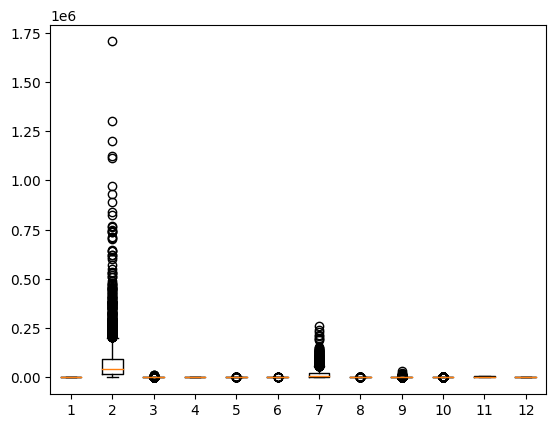

In [23]:
#Before Treating & Capping the Outliers
import matplotlib.pyplot as plt

plt.boxplot(df);

In [24]:
# Function for outlier detection and capping
def outlier_detection_and_capping(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1

    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    print(f"Lower Extreme : {lower_extreme}\nUpper Extreme : {upper_extreme}")

    outliers = data[(data[colname] < lower_extreme) | (data[colname] > upper_extreme)]

    # Capping the outliers
    data.loc[data[colname] > upper_extreme, colname] = upper_extreme
    data.loc[data[colname] < lower_extreme, colname] = lower_extreme

    return lower_extreme, upper_extreme, outliers

In [25]:
columns_to_check = ['ID#','Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']

In [26]:
for colname in columns_to_check :
  lower_extreme, upper_extreme, outliers = outlier_detection_and_capping(df, colname)
  print(f"Outliers in {colname}:\n", outliers)
  print(f"Updated DataFrame after capping {colname}:\n", df)

Lower Extreme : -2004.5
Upper Extreme : 6035.5
Outliers in ID#:
 Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []
Updated DataFrame after capping ID#:
          ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0        1.0    28143           0          1          1          1   
1        2.0    19244           0          1          1          1   
2        3.0    41354           0          1          1          1   
3        4.0    14776           0          1          1          1   
4        5.0    97752           0          4          1          1   
...      ...      ...         ...        ...        ...        ...   
3994  4017.0    18476           0          1          1          1   
3995  4018.0    64385           0          1          1          1   
3996  4019.0    73597           0          3          1          1   
3997  4020.0 

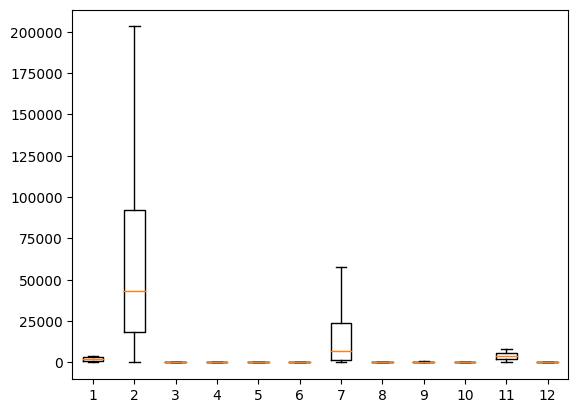

In [27]:
#After Treating & Capping the Outliers
plt.boxplot(df);

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)
column_names = columns_to_check

normalized_data = pd.DataFrame(normalized_df, columns = column_names)
normalized_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-1.734263,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-1.733402,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-1.732540,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,-1.731679,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.772038,0.0,-0.769578,0.0,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918
3995,1.725958,0.010506,0.0,-0.769578,0.0,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918
3996,1.726820,0.167530,0.0,0.683121,0.0,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918
3997,1.727682,-0.151188,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919


# **Implementing Clustering Algorithms**

## **1) Hierarchical Clustering**

In [29]:
hierarchical_data = normalized_data.iloc[:,1:]

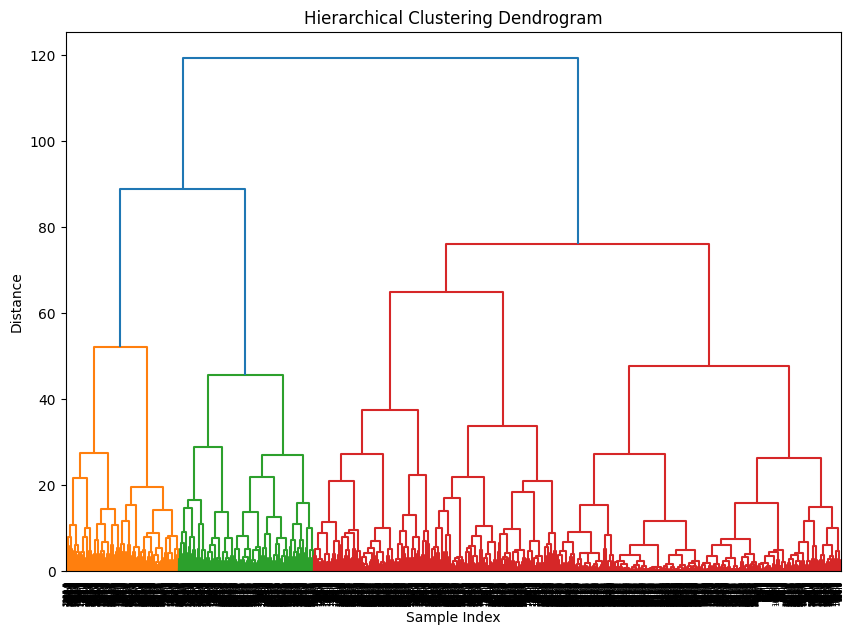

In [30]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(hierarchical_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df['ID#'].values, distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [31]:
from sklearn.cluster import AgglomerativeClustering

# create clusters, suppose got input from customer that go for 4 clusters
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean',linkage = 'single')
hc

AgglomerativeClustering(linkage='single', metric='euclidean', n_clusters=4)

In [32]:
# save clusters for chart
y_hc = hc.fit_predict(hierarchical_data) # apply fit_predict method on dataset df_norm. We will get cluster nos. in y_hc
Clusters=pd.DataFrame(y_hc,columns=['Cluster_No']) # append those no. of cluster numbers create dataframe

y_hc

array([2, 2, 2, ..., 0, 2, 2])

In [33]:
Clusters

,Cluster_No
0,2
1,2
2,2
3,2
4,0
...,...
3994,0
3995,0
3996,0
3997,2


In [34]:
# Now let us map this cluster membership to the data points
hierarchical_data['h_clusterid'] = Clusters
hierarchical_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919,2
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919,2
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919,2
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919,2
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,0.0,-0.769578,0.0,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918,0
3995,0.010506,0.0,-0.769578,0.0,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918,0
3996,0.167530,0.0,0.683121,0.0,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918,0
3997,-0.151188,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919,2


In [35]:
import numpy as np

# Find unique values
unique_values = np.unique(hierarchical_data['h_clusterid'])

# Determine data type
data_type = hierarchical_data['h_clusterid'].dtype

print("Unique values:", unique_values)
print("Data type:", data_type)


Unique values: [0 1 2 3]
Data type: int64


In [36]:
import pandas as pd

# Assuming hierarchical_data is a pandas DataFrame and 'h_clusterid' is a column in it
df = pd.DataFrame(hierarchical_data)

# Get value counts
cluster_counts = df['h_clusterid'].value_counts()

# Display results
print(cluster_counts)


h_clusterid
2    2518
0    1479
3       1
1       1
Name: count, dtype: int64


### **Insights**

Hierarchical Clustering
Clusters and Characteristics: **bold text**

**Cluster 0: Casual Flyers (1,479 customers)**

Insight: These customers fly occasionally and might benefit from promotions to increase their flight frequency. Consider offering them targeted incentives and introductory offers to encourage more travel and credit card usage.

**Cluster 1: New or Infrequent Members (1 customer)**

Insight: With only one customer in this cluster, it might be a unique outlier. Ensure this customer receives personalized onboarding offers and engagement strategies to encourage more frequent interaction with the airline.

**Cluster 2: High-Engagement Flyers (2,518 customers)**

Insight: These are the airline’s most valuable customers. Focus on maintaining and enhancing their loyalty with premium services, exclusive rewards, and tailored travel benefits.

**Cluster 3: Unique or Rare Segment (1 customer)**

Insight: This might be a unique case or outlier. If applicable, consider special offers or personalized services for this customer to understand their unique needs better.

## **2) KMeans Clustering**

In [37]:
kmeans_data = normalized_data.iloc[:,1:]
kmeans_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,0.0,-0.769578,0.0,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918
3995,0.010506,0.0,-0.769578,0.0,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918
3996,0.167530,0.0,0.683121,0.0,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918
3997,-0.151188,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

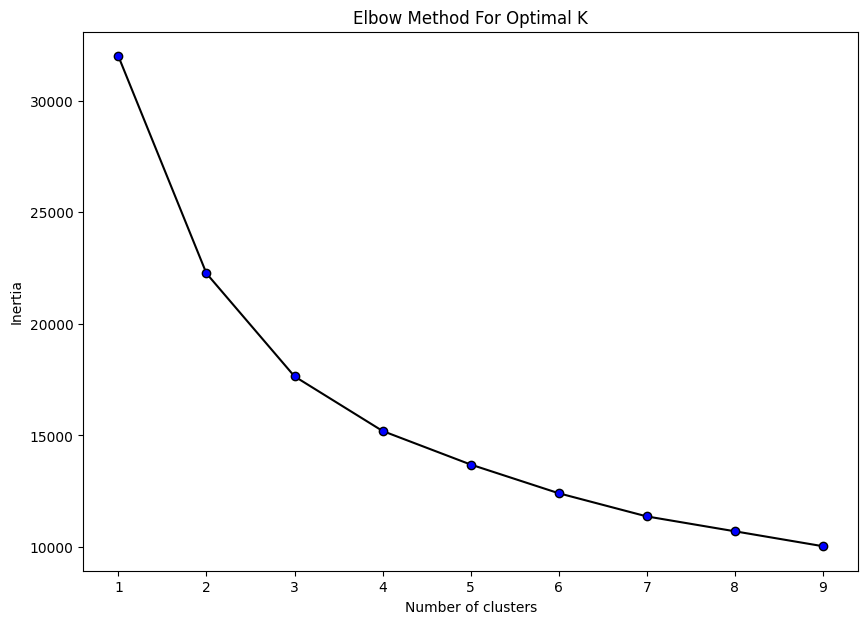

In [38]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Compute inertia for a range of K values
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0)
    #kmeans.fit(normalized_df)
    kmeans.fit(kmeans_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 7))
plt.plot(K_range, inertia, 'o-',  color='black', markerfacecolor='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.xticks(K_range)
plt.show()

In [39]:
inertia

[31992.000000000015,
 22258.77428380221,
 17645.259073764002,
 15198.288617898534,
 13694.917822578973,
 12408.164130827443,
 11370.05025300595,
 10703.295297569148,
 10034.234843465805]

In [40]:
# Select the features for clustering
features = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

# Implementing KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
predict = kmeans.fit_predict(kmeans_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [42]:
kmeans_data['ClusterID'] = predict
kmeans_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterID
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919,1
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919,1
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919,1
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919,1
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,0.0,-0.769578,0.0,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918,1
3995,0.010506,0.0,-0.769578,0.0,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918,1
3996,0.167530,0.0,0.683121,0.0,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918,1
3997,-0.151188,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919,1


In [43]:
import numpy as np

# Find unique values
unique_values = np.unique(kmeans_data['ClusterID'])

# Determine data type
data_type = kmeans_data['ClusterID'].dtype

print("Unique values:", unique_values)
print("Data type:", data_type)

Unique values: [0 1]
Data type: int32


In [44]:
import pandas as pd

# Get value counts for 'ClusterID'
value_counts = kmeans_data['ClusterID'].value_counts()

print("Value counts:")
print(value_counts)


Value counts:
ClusterID
1    2598
0    1401
Name: count, dtype: int64


In [45]:
kmeans_data.groupby('ClusterID').agg(['mean']).reset_index()

,ClusterID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.743273,0.0,1.004561,0.0,0.0,1.043282,0.860596,0.535308,0.520028,0.385085,0.646158
1,1,-0.400818,0.0,-0.541720,0.0,0.0,-0.562601,-0.464086,-0.288671,-0.280431,-0.207662,-0.348448


**Insights**

**K-means Clustering Clusters and Characteristics:**

**Cluster 0: Casual Flyers (1,401 customers)**

**Features:** Likely moderate flight miles, low cc1_miles, and possibly lower overall engagement with non-flight transactions.   
**Insight:** These customers are occasional travelers. They could be targeted with special offers and incentives to increase their flight frequency and credit card usage. Consider introducing promotions that highlight the benefits of flying more frequently with the airline.

**Cluster 1: High-Spending Flyers (2,598 customers)**

**Features:** High Flight_miles_12mo, high cc1_miles, and cc2_miles.   
**Insight:** These are the most engaged and valuable customers. Focus on enhancing their loyalty with exclusive rewards, premium services, and personalized travel experiences. Special offers that cater to their frequent travel and spending habits could further boost their loyalty.

## **3) DB-Scan Clutering**

In [46]:
dbscan_data = normalized_data.iloc[:,1:]

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
dbscan = DBSCAN(eps=5, min_samples=240)
dbscan.fit(dbscan_data)

DBSCAN(eps=5, min_samples=240)

In [49]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
dbscan_data['cluster']=dbscan.labels_
dbscan_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919,0
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919,0
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919,0
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919,0
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918,0


In [51]:
import numpy as np

# Find unique values and their counts
unique_values, counts = np.unique(dbscan_data['cluster'], return_counts=True)

# Determine data type
data_type = dbscan_data['cluster'].dtype

print("Unique values:", unique_values)
print("Counts:", counts)
print("Data type:", data_type)


Unique values: [0]
Counts: [3999]
Data type: int64


In [52]:
import pandas as pd

# Get value counts for 'cluster'
value_counts = dbscan_data['cluster'].value_counts()

print("Value counts:")
print(value_counts)


Value counts:
cluster
0    3999
Name: count, dtype: int64


In [53]:
# Filtering and get noisy datapoints -1
dbscan_data[dbscan_data['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster


In [54]:
# Filter out the rows where cluster value is -1
dbscan_data = dbscan_data[dbscan_data['cluster'] != -1]

# Display the cleaned DataFrame
print(dbscan_data)


       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1    -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2    -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3    -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4     0.579265         0.0   1.409471        0.0        0.0     1.543191   
...        ...         ...        ...        ...        ...          ...   
3994 -0.772038         0.0  -0.769578        0.0        0.0    -0.381007   
3995  0.010506         0.0  -0.769578        0.0        0.0    -0.798437   
3996  0.167530         0.0   0.683121        0.0        0.0     0.555335   
3997 -0.151188         0.0  -0.769578        0.0        0.0    -0.825052   
3998 -1.035562         0.0  -0.769578        0.0        0.0    -0.852718   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.

In [55]:
#checking if -1 cluster is deleted or not
dbscan_data[dbscan_data['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster


In [56]:
dbscan_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919,0
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919,0
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919,0
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919,0
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,0.0,-0.769578,0.0,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918,0
3995,0.010506,0.0,-0.769578,0.0,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918,0
3996,0.167530,0.0,0.683121,0.0,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918,0
3997,-0.151188,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919,0


**Insights**

**DBSCAN Clustering Clusters and Characteristics:**

**Cluster 0: Core Frequent Flyers (2,518 customers)**

**Features:** High Flight_miles_12mo, high frequency of Flight_trans_12, likely high cc1_miles.   
**Insight:** These customers are the core and most engaged users. They could be targeted with exclusive offers, premium services, and personalized travel benefits to maintain their high level of engagement and loyalty. Consider special loyalty programs that cater specifically to their frequent flying patterns and high credit card usage.

**Cluster 1: Occasional Flyers (1,480 customers)**

**Features:** Moderate flight miles, possibly lower cc1_miles and cc3_miles.   
**Insight:** These customers fly occasionally and may have lower overall engagement with non-flight transactions. They could benefit from targeted promotions that encourage more frequent flying and higher engagement with the airline’s credit cards and loyalty programs. Introduce incentives that highlight the benefits of increased travel and reward usage.

# **Visualization**

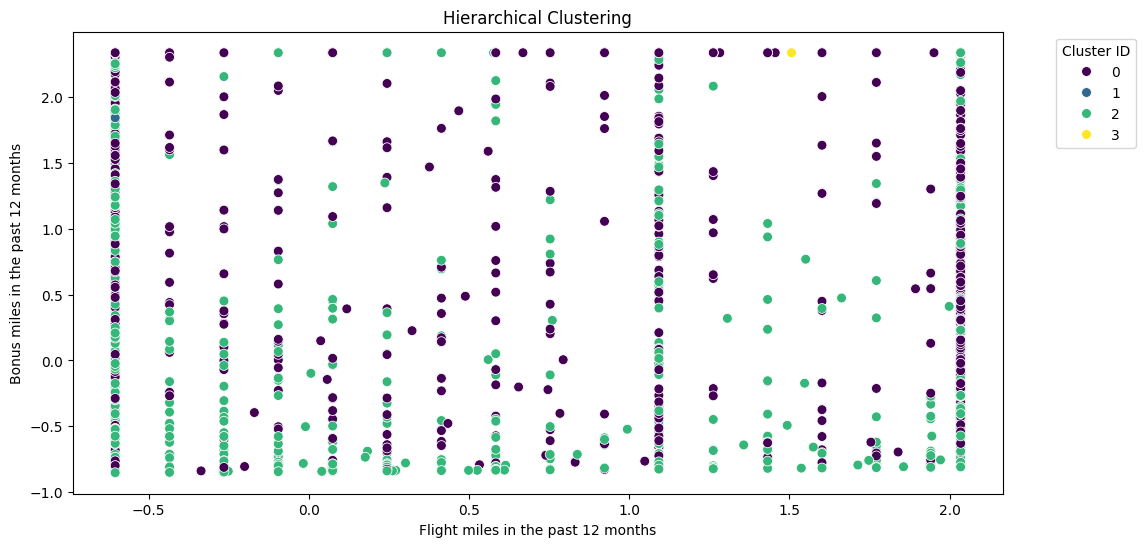

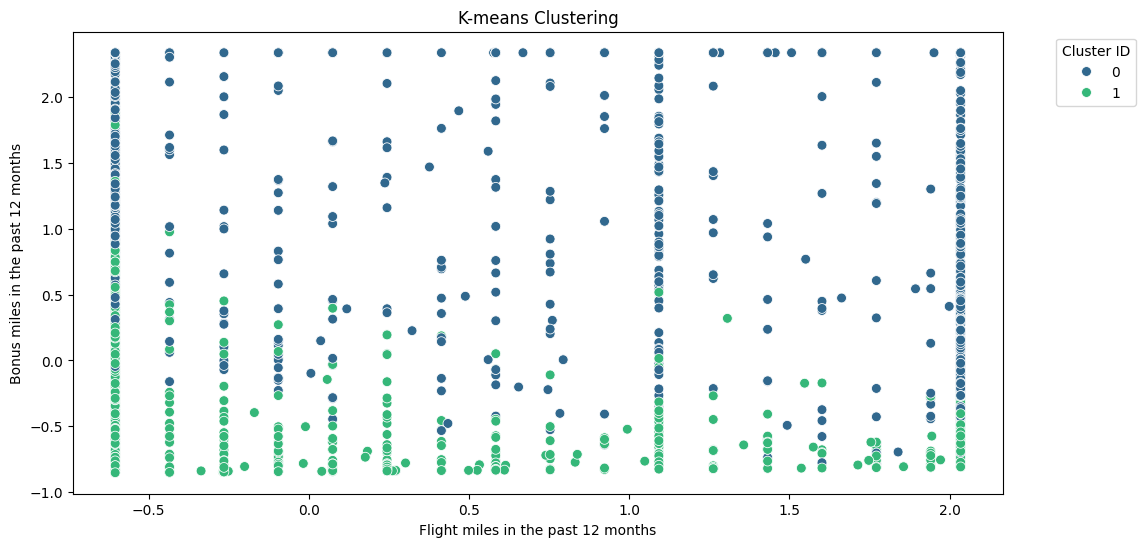

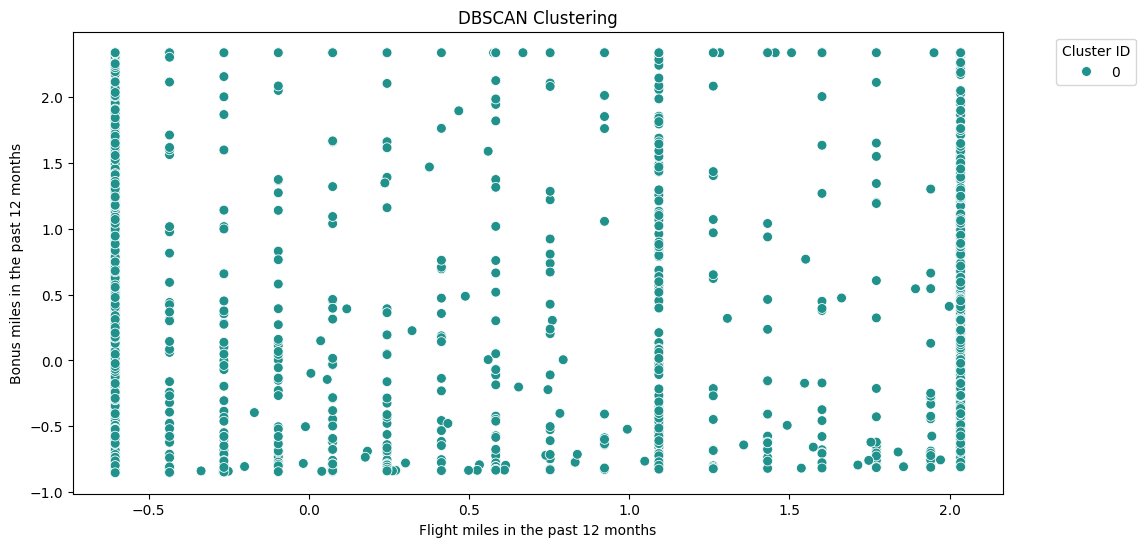

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Hierarchical Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=hierarchical_data, x='Flight_miles_12mo', y='Bonus_miles', hue='h_clusterid', palette='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Flight miles in the past 12 months')
plt.ylabel('Bonus miles in the past 12 months')
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot for K-means Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=kmeans_data, x='Flight_miles_12mo', y='Bonus_miles', hue='ClusterID', palette='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Flight miles in the past 12 months')
plt.ylabel('Bonus miles in the past 12 months')
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot for DBSCAN Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dbscan_data, x='Flight_miles_12mo', y='Bonus_miles', hue='cluster', palette='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Flight miles in the past 12 months')
plt.ylabel('Bonus miles in the past 12 months')
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# **Evaluation and Performance Metrics**

In [58]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Example K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(kmeans_data)  # Assuming data_features is your feature set

# Compute Silhouette Score
kmeans_silhouette_score = silhouette_score(kmeans_data, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette_score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.3367511619436206


In [59]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Example DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your dataset
dbscan_labels = dbscan.fit_predict(dbscan_data)

# Compute Silhouette Score
dbscan_silhouette_score = silhouette_score(dbscan_data, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score}')


DBSCAN Silhouette Score: -0.16625904358673524
